In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

%matplotlib inline

In [56]:
df= pd.read_csv(r'COVID19.csv', delimiter=';', header= 0, names= ['day','month','year','cases','deaths','countriesAndTerritories','geoId','countryterritoryCode','popData2018'])
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...
10532,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10533,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
10534,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10535,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [57]:
df.head(10)

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
5,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
6,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
7,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
8,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
9,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 9 columns):
day                        10537 non-null int64
month                      10537 non-null int64
year                       10537 non-null int64
cases                      10537 non-null int64
deaths                     10537 non-null int64
countriesAndTerritories    10537 non-null object
geoId                      10507 non-null object
countryterritoryCode       10328 non-null object
popData2018                10369 non-null float64
dtypes: float64(1), int64(5), object(3)
memory usage: 741.0+ KB


In [59]:
df.isnull().sum()

day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       30
countryterritoryCode       209
popData2018                168
dtype: int64

In [60]:

df = df.drop(['countriesAndTerritories','geoId', 'countryterritoryCode', 'popData2018'], axis =1)


In [61]:
df.head()


,day,month,year,cases,deaths
0,13,4,2020,52,0
1,12,4,2020,34,3
2,11,4,2020,37,0
3,10,4,2020,61,1
4,9,4,2020,56,3


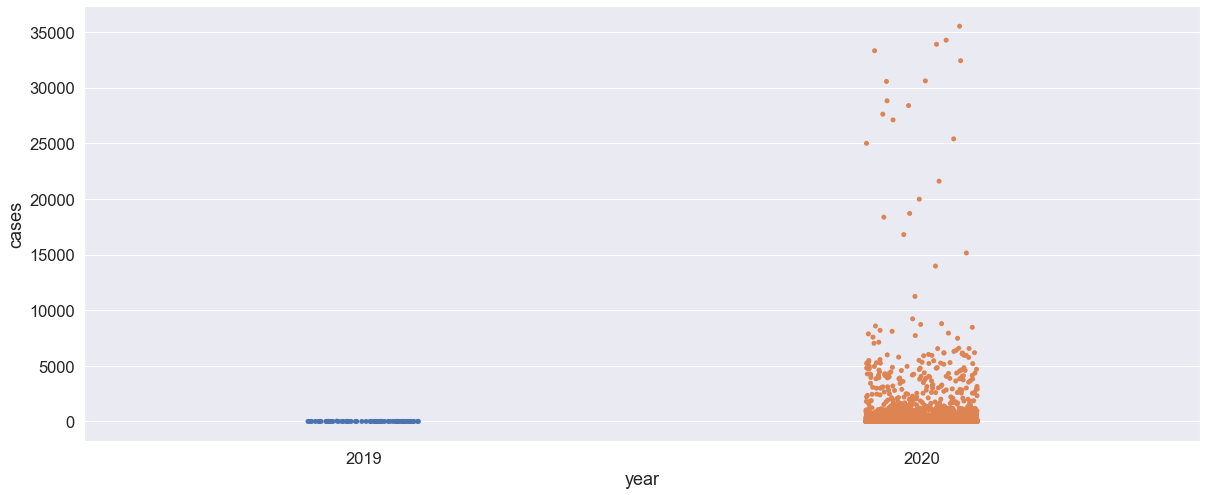

In [62]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sb.stripplot(x="year", y="cases", data=df);

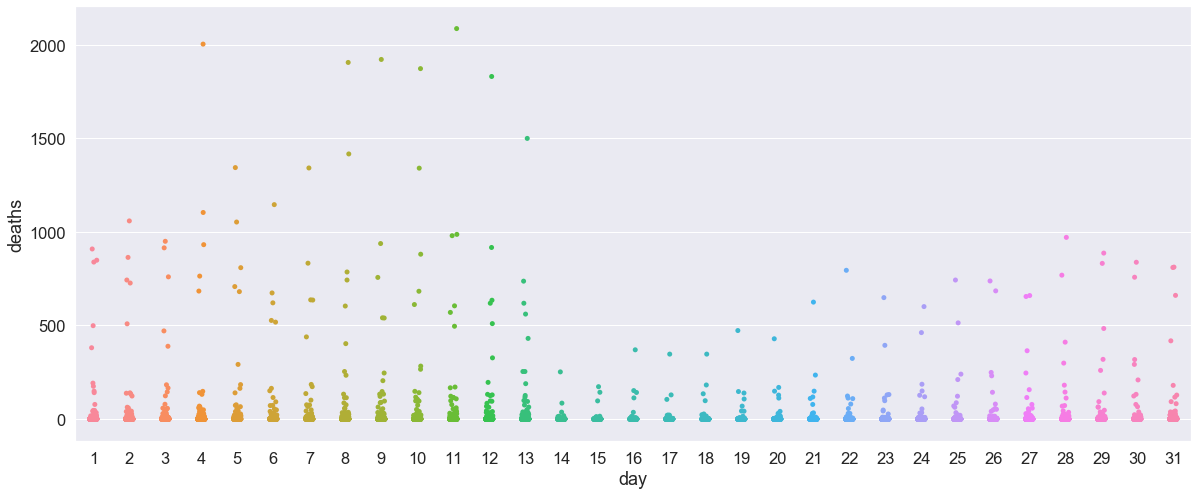

In [63]:
plt.figure(figsize=(20, 8))
sb.stripplot(x="day", y="deaths", data=df);

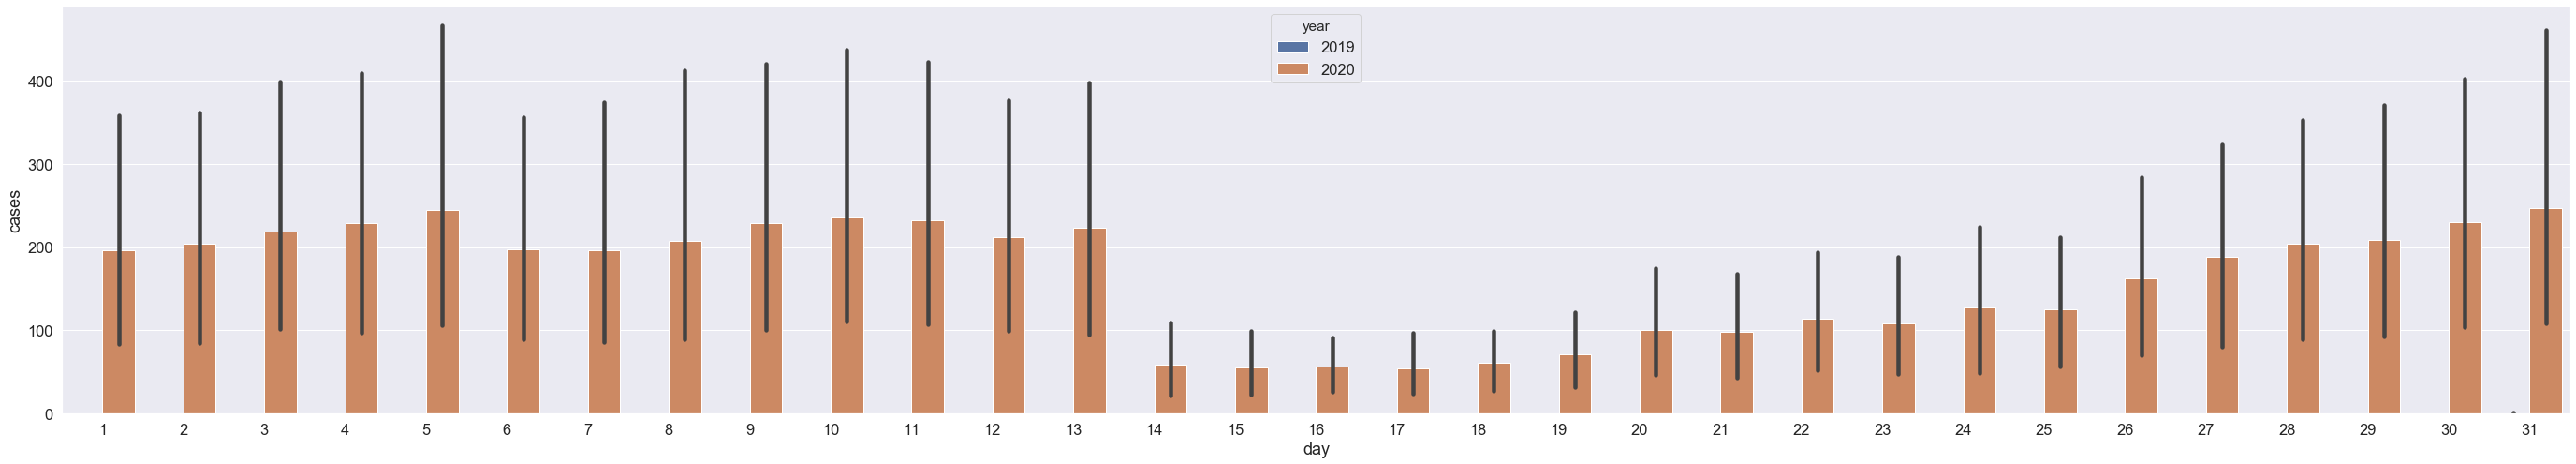

In [64]:
plt.figure(figsize=(48, 8))

sb.barplot(x="day", y="cases", hue="year", data=df);

In [97]:
columns = ['day','month','year','deaths']
labels = df['cases'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [98]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("Accuracy in the training data: ", Accuracy*100, "%")

accuracy = regr.score(X_test, y_test)
print("Accuracy in the test data", accuracy*100, "%")


Accuracy in the training data:  68.54225619348837 %
Accuracy in the test data 60.08719985742042 %


In [99]:
columns = ['day','month','year','deaths']
labels = df['cases'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
import sys
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print (' اداء النموذج في عينة التدريب بدقة ', Accuracy*100)

accuracy = regr.score(X_test, y_test)
print (' اداء النموذج في عينة الفحص بدقة ', accuracy*100)

 اداء النموذج في عينة التدريب بدقة  62.56774736451626
 اداء النموذج في عينة الفحص بدقة  72.19378095437023
